# Imports de llibreries

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# Càrrega dels datasets

In [140]:
df_proposals = pd.read_csv("./data/participa.gencat.cat-open-data-proposals.csv")
df_comments = pd.read_csv("./data/participa.gencat.cat-open-data-proposal_comments.csv")

# Exploratory Data Analysis

In [141]:
print(df_proposals.columns)
print(f"Nombre de columnes: {len(df_proposals.columns)}")
print(f"Dimensió del dataset: {df_proposals.shape}")

Index(['id', 'category/id', 'category/name/ca', 'category/name/es',
       'category/name/oc', 'scope/id', 'scope/name/en', 'scope/name/ca',
       'scope/name/es', 'scope/name/oc', 'participatory_space/id',
       'participatory_space/url', 'component/id', 'title/ca', 'body/ca',
       'address', 'latitude', 'longitude', 'state', 'reference', 'answer/en',
       'answer/ca', 'answer/es', 'answer/oc', 'supports',
       'endorsements/total_count', 'endorsements/user_endorsements',
       'comments', 'attachments', 'followers', 'published_at', 'url',
       'meeting_urls', 'related_proposals', 'is_amend',
       'original_proposal/title', 'original_proposal/url', 'category/name/en',
       'title/oc', 'body/oc', 'title/es', 'body/es',
       'original_proposal/title/ca', 'title/en', 'body/en'],
      dtype='object')
Nombre de columnes: 45
Dimensió del dataset: (10440, 45)


Observem que el dataset de propostes té 45 columnes diferents i un total de 10440 files. Per poder seleccionar només les files que ens interessen, agafarem el subset que tingui la url de l'espai participatori corresponent a l'Assemblea Ciutadana pel Clima de Catalunya. En aquest cas és la columna `participatory_space/url`, i la url en concret `http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima`.

In [142]:
df_proposals = df_proposals[df_proposals['participatory_space/url'] == 'http://participa.gencat.cat/processes/assembleaclima?participatory_process_slug=assembleaclima']
print(f"Nombre de propostes: {len(df_proposals)}")
df_proposals.head(5)

Nombre de propostes: 59


,id,category/id,category/name/ca,category/name/es,category/name/oc,scope/id,scope/name/en,scope/name/ca,scope/name/es,scope/name/oc,...,original_proposal/title,original_proposal/url,category/name/en,title/oc,body/oc,title/es,body/es,original_proposal/title/ca,title/en,body/en
9622,87446,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9623,87447,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9624,87450,2540.0,Desplegament de les energies renovables,Despliegue de las energías renovables,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9625,87451,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9626,87452,2541.0,Model d'alimentació pel futur,Modelo de alimentación para el futuro,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observem a primera vista que existeixen moltes columnes on els valors són NaNs i que potser no ens interessen gaire. Per tant, doncs, eliminem les columnes que continguin íntegrament valors NaNs.

In [143]:
df_proposals = df_proposals.dropna(axis=1)
df_proposals = df_proposals.reset_index(drop=True)
print(f"Nou nombre de columnes: {len(df_proposals.columns)}")

Nou nombre de columnes: 15


Un cop eliminades les columnes que només contenien valors NaNs, es redueix el nombre de columnes de 45 a només 15. Una reducció significativa.
Seguim amb el tractament ara del dataset dels comentaris a les propostes.

In [144]:
print(df_comments.columns)
print(f"Nombre de columnes: {len(df_comments.columns)}")
print(f"Dimensió del dataset: {df_comments.shape}")

Index(['id', 'created_at', 'body', 'locale', 'author/id', 'author/name',
       'alignment', 'depth', 'user_group/id', 'user_group/name/en',
       'user_group/name/ca', 'user_group/name/es', 'user_group/name/oc',
       'commentable_id', 'commentable_type', 'root_commentable_url'],
      dtype='object')
Nombre de columnes: 16
Dimensió del dataset: (5171, 16)


Observem que existeixen 16 columnes diferents al dataset i que té 5171 files. Una de les columnes és `commentable_id`, que sembla que és la id de la proposta a la que pertany cada comentari. Així doncs, agafem un subset que contingui només les que coincideixin.

In [145]:
df_comments = df_comments[df_comments['commentable_id'].isin(df_proposals['id'])]
print(f"Nombre de comentaris a les propostes: {len(df_comments)}")
df_comments.head(3)

Nombre de comentaris a les propostes: 14


,id,created_at,body,locale,author/id,author/name,alignment,depth,user_group/id,user_group/name/en,user_group/name/ca,user_group/name/es,user_group/name/oc,commentable_id,commentable_type,root_commentable_url
4937,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,NaN,NaN,NaN,NaN,NaN,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4938,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,NaN,NaN,NaN,NaN,NaN,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
4939,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,NaN,NaN,NaN,NaN,NaN,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


En aquest cas, observem que només hi han 14 comentaris a les 59 propostes totals.

In [146]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 4937 to 4952
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    14 non-null     int64  
 1   created_at            14 non-null     object 
 2   body                  14 non-null     object 
 3   locale                14 non-null     object 
 4   author/id             14 non-null     int64  
 5   author/name           14 non-null     object 
 6   alignment             14 non-null     int64  
 7   depth                 14 non-null     int64  
 8   user_group/id         0 non-null      float64
 9   user_group/name/en    0 non-null      float64
 10  user_group/name/ca    0 non-null      float64
 11  user_group/name/es    0 non-null      float64
 12  user_group/name/oc    0 non-null      float64
 13  commentable_id        14 non-null     int64  
 14  commentable_type      14 non-null     object 
 15  root_commentable_url  14 

Tal com passava amb el dataset de les propostes, existeixen unes quantes columnes amb únicament valors NaN, per tant les eliminem i aconseguim reduir el nombre a 11 columnes.

In [147]:
df_comments = df_comments.dropna(axis=1)
print(f"Nou nombre de columnes: {len(df_comments.columns)}")
df_comments = df_comments.reset_index(drop=True)
df_comments.head(3)

Nou nombre de columnes: 11


,id,created_at,body,locale,author/id,author/name,alignment,depth,commentable_id,commentable_type,root_commentable_url
0,53292,2023-10-12 10:55:08 +0200,L'emergència climàtica ens afecta a tots els h...,ca,58730,JORGE MANUEL,0,0,87447,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
1,53315,2023-10-17 15:30:13 +0200,Penso el mateix. A més us esteu gastant uns di...,ca,59090,MARC,1,0,87461,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...
2,53323,2023-10-19 19:59:58 +0200,Molt d'acord,ca,59319,Jordi Sanjuan Fuentes,1,0,87468,Decidim::Proposals::Proposal,http://participa.gencat.cat/processes/assemble...


## Anàlisi dels atributs

### Propostes

#### Id

In [160]:
print(type(df_proposals['id'][0]))
print(len(df_proposals['id']) == df_proposals['id'].nunique())

<class 'numpy.int64'>
True


La columna `id` conté valors numèrics i és un identificador únic de cada proposta diferent. No existeixen ids repetits.

#### Created_at

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<Axes: xlabel='published_at'>

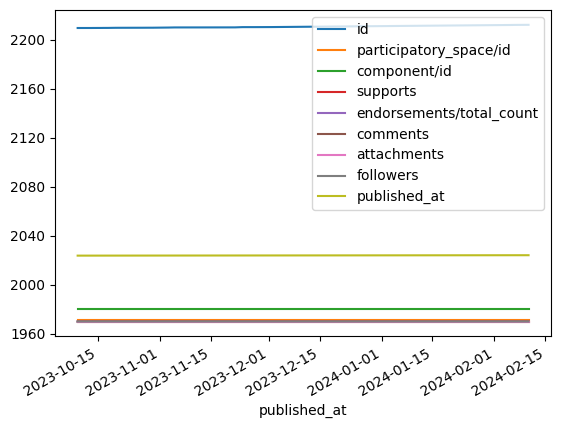

In [159]:
print(type(df_proposals['published_at'][0]))
df_proposals['published_at'] = pd.to_datetime(df_proposals['published_at'], utc=True)
df_proposals.set_index(df_proposals['published_at']).plot()

In [163]:
grouped = df_proposals.groupby('author/name').resample('M').size().unstack(fill_value=0)

# Plot para cada autor
grouped.plot(marker='o')
plt.xlabel('Fecha de publicación')
plt.ylabel('Número de publicaciones')
plt.title('Número de publicaciones mensuales por autor')
plt.legend(title='Autores', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'author/name'